# Vector analysis

In this chapter, we will introduce the concept of a vector field, which is a rule that assigns a vector to each point in space.

## 8.1 Scalar and vector fields

A scalar field is a function that assigns a single number to every point in space.

### Example 8.1: Plotting a scalar field

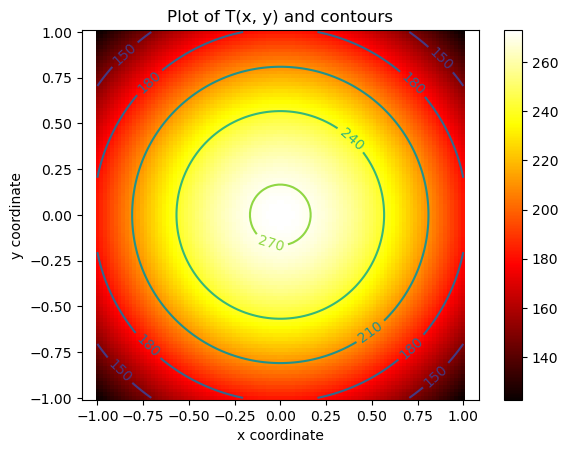

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

coord_range = np.linspace(-1, 1, 100)

x, y = np.meshgrid(coord_range, coord_range)

T0, sigma = 273.0, 0.4

T = T0 * np.exp(-sigma * (x**2 + y**2))

# Use contour () to plot the contours and
# use clabel() to label the contours

plt.pcolormesh(x, y, T, cmap=cm.hot)
plt.colorbar();

plt.clabel(plt.contour(x, y, T, 5))

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.axis('equal')
plt.title('Plot of T(x, y) and contours')
plt.show()

### Example 8.2: Plotting a vector field

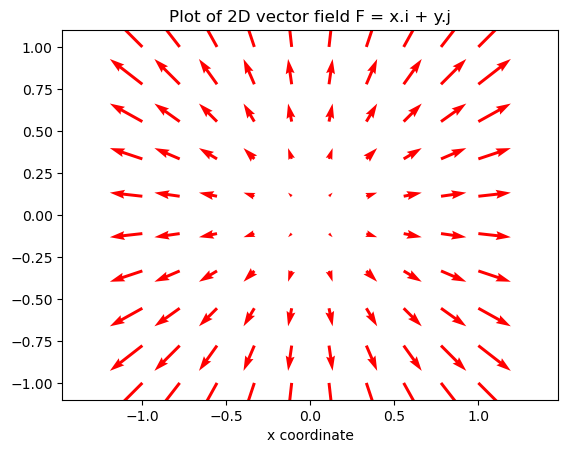

In [8]:
import numpy as np
import matplotlib.pyplot as plt

coord_range = np.linspace(-1, 1, 10)
x, y = np.meshgrid(coord_range, coord_range)

# vector field components
vx = x
vy = y

# plot arrows at the points (x, y) with length (vx, vy)
plt.quiver(x, y, vx, vy, color='r')
plt.xlabel('x coordinate')

plt.axis('equal')
plt.title('Plot of 2D vector field F = x.i + y.j')
plt.show()

In the next several sections, we will examine how scalar fields and vector fields change as a function of spatial coordinates. We will see that there are three derivatives we can find.
1. Gradient: In which directioni is a scalar field most rapidly changing? What is that rate of change of the scalar field?
2. Divergence of the vector field: What is the net out-flow rate of a vector field?
3. Curl of the vector field: What is the rotational rate of a vector field?

## 8.2 The gradient of a scalar field

### Example 8.3: Gravitational potential energy

In [9]:
from sympy.vector import CoordSys3D, gradient, Del
from sympy import symbols, sqrt
import numpy as np
import matplotlib.pyplot as plt

R = CoordSys3D('R')
delop = Del()
G, m, Me = symbols('G, m, Me')

V = -G*m*Me/sqrt(R.x**2 + R.y**2 + R.z**2)
F = -delop(V).doit()  # evaluate all 3 components of gradient vector F

# use .coef method to get components Fx, Fy, Fz
print('x-component of gradient = ', F.coeff(R.i))
print('y-component of gradient = ', F.coeff(R.j))
print('z-component of gradient = ', F.coeff(R.k))

x-component of gradient =  -R.x*G*Me*m/(R.x**2 + R.y**2 + R.z**2)**(3/2)
y-component of gradient =  -R.y*G*Me*m/(R.x**2 + R.y**2 + R.z**2)**(3/2)
z-component of gradient =  -R.z*G*Me*m/(R.x**2 + R.y**2 + R.z**2)**(3/2)


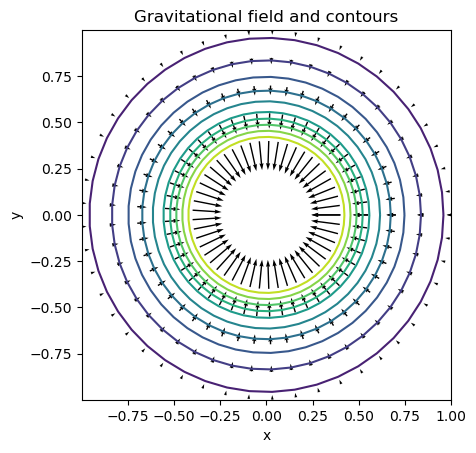

In [14]:
# Create grid for radius r and polar angle theta
# r=0.4 to r=1, and theta=0,2*pi
r, theta = np.mgrid[0.4:1:5j, 0.0:2*np.pi:50j]

# calculate values of x, y where arrows will be drawn
x = r*np.cos(theta)
y = r*np.sin(theta)

# Gravitational potential V with m=M=G=1
V = 1/(x**2 + y**2)**(1/2)

# creating plot of Force and contours where V=constant
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Components of Force along x and y axis
Fx = -x/(x**2+y**2)**(3/2)
Fy = -y/(x**2+y**2)**(3/2)

plt.quiver(x, y, Fx, Fy)
plt.contour(x, y, V, 10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gravitational field and contours')
plt.show()

### Example 8.4: The directional derivative

In [16]:
from sympy import simplify
from sympy.vector import CoordSys3D, directional_derivative, gradient

C = CoordSys3D('C')
f = C.x * C.y * C.z  # scalar field f(x, y, z)=xyz
v = C.i + C.j + C.k  # vector v defines desired direction
n = v.normalize()  # n = normalized vector v
print(n)

# directional deriv=dot product of n and gradient(f)
print(simplify(n.dot(gradient(f))))

# Shortcut method for directional deriv,
# using the dedicated function direction_derivative
print(simplify(directional_derivative(C.x*C.y*C.z,n)))

(sqrt(3)/3)*C.i + (sqrt(3)/3)*C.j + (sqrt(3)/3)*C.k
sqrt(3)*(C.x*C.y + C.x*C.z + C.y*C.z)/3
sqrt(3)*(C.x*C.y + C.x*C.z + C.y*C.z)/3


### 8.2.1 The gradient in other coordinate systems

The sympy.vector library supports the evaluation of the gradient, divergence and curl in orthogonal curvilinear coordinate systems.

### Example 8.5: The gradient in cylindrical coordinates

In [18]:
# Gradient of a vector in cylindrical coordinates
from sympy import sin, cos, flatten
from sympy.vector import CoordSys3D, gradient, curl, divergence

# part (a)
# define Cartesian system named c, with unit vectors c.i, c.j, c.k
# Transform it to system with cylindrical coordinates (rho, phi, z)

# variables are  c.r, c.t, c.z for rho, phi, z
# unit vectors c.R, c.P, c.Z

c = CoordSys3D('c', transformation='cylindrical',\
variable_names = list("rpz"), vector_names=list("RPZ"))

scalar = c.r*sin(c.p)*cos(c.z)
print(scalar)

c.r*sin(c.p)*cos(c.z)


In [19]:
gr = gradient(scalar)
print(gr)

(sin(c.p)*cos(c.z))*c.R + (cos(c.p)*cos(c.z))*c.P + (-c.r*sin(c.p)*sin(c.z))*c.Z


In [20]:
print(gr.coeff(c.R))
print(gr.coeff(c.P))
print(gr.coeff(c.Z))

sin(c.p)*cos(c.z)
cos(c.p)*cos(c.z)
-c.r*sin(c.p)*sin(c.z)


In [21]:
# part(b)sphericalcoordinates
# variablesarec.r,c.theta,c.phi
N =CoordSys3D('N', transformation='spherical',\
variable_names=list("rtp"),vector_names=list("RTP") )
scalar =N.r*sin(N.t)*cos(N.p)
print('\n-------Gradient insphericalcoordinates-------')
print('scalar =',scalar)
gr=gradient(scalar)
print('\nThe gradientofthisscalarinsphericalcoordinatesis:')
print(gr)
print('\nThe r-componentofthegradientis:', gr.coeff(N.R))
print('The theta-componentofthegradientis:', gr.coeff(N.T))
print('The phi-componentofthegradientis:', gr.coeff(N.P))


-------Gradient insphericalcoordinates-------
scalar = N.r*sin(N.t)*cos(N.p)

The gradientofthisscalarinsphericalcoordinatesis:
(sin(N.t)*cos(N.p))*N.R + (cos(N.p)*cos(N.t))*N.T + (-sin(N.p))*N.P

The r-componentofthegradientis: sin(N.t)*cos(N.p)
The theta-componentofthegradientis: cos(N.p)*cos(N.t)
The phi-componentofthegradientis: -sin(N.p)


## 8.3 Properties of the gradient

### Example 8.6: The derivative rule for gradient

In [24]:
from sympy.vector import CoordSys3D, gradient
C = CoordSys3D('C')  # define Cartesian system, named here C
# The scalar field f(x, y, z) is a function of the Cartesian
# coordinate variables C.x, C.y, C.z

from sympy import symbols, Function
f, g = symbols('f, g', cls=Function)

# Define the scalar fields as fscalar(x, y, z), gscalar(x, y, z),
fscalar = f(C.x, C.y, C.z)
gscalar = g(C.x, C.y, C.z)

# Construct the expression for the LHS: grad(f.g)
lhs = gradient(fscalar*gscalar)

# Construct the expression for the rhs: grad(f).g + grad(g).f
rhs = gradient(fscalar)*gscalar+gradient(gscalar)*fscalar

# compare the two sides
print(lhs==rhs)
print(lhs)

True
(f(C.x, C.y, C.z)*Derivative(g(C.x, C.y, C.z), C.x) + g(C.x, C.y, C.z)*Derivative(f(C.x, C.y, C.z), C.x))*C.i + (f(C.x, C.y, C.z)*Derivative(g(C.x, C.y, C.z), C.y) + g(C.x, C.y, C.z)*Derivative(f(C.x, C.y, C.z), C.y))*C.j + (f(C.x, C.y, C.z)*Derivative(g(C.x, C.y, C.z), C.z) + g(C.x, C.y, C.z)*Derivative(f(C.x, C.y, C.z), C.z))*C.k


## 8.4 Divergence

Roughly speaking the divergence is a measure of the net outward flow rate of a vector field.

### Example 8.7: Solenoidal vector fields

In [25]:
from sympy.vector import CoordSys3D, divergence, is_solenoidal
from sympy import symbols

R = CoordSys3D('R')
E0 = symbols('E0')

# The Electric field E
E =3*R.x**2*R.y**2*R.z*R.i\
+ 2*R.x**3*R.y*R.z*R.j\
+ R.x**3*R.y**2*R.k

print('The charge density rho = ')
print(E0*divergence(E))

print('\nThe statement E is a solenoidal field is:', is_solenoidal(E))

The charge density rho = 
E0*(2*R.x**3*R.z + 6*R.x*R.y**2*R.z)

The statement E is a solenoidal field is: False


## 8.5 Curl

From a physical point of view, the curl at a point (x, y, z) is proportional to the on-aixs torque to which a tiny pinwheel would be subjected, if it were centered at that point.

### Example 8.8: Evaluation of the curl and divergence in cylindircal coordinates

In [29]:
from sympy import sin, cos, flatten
from sympy.vector import CoordSys3D, gradient, curl, divergence

c = CoordSys3D('c', transformation='spherical',\
variable_names=list('rtp'), vector_names=list("RTP"))

v = c.r*sin(c.t)*c.R + cos(c.p)*c.T

curl_v = curl(v)
div_v = divergence(v)

print(curl_v, '\n')
print(div_v)

(sin(c.p)/(c.r*sin(c.t)))*c.R + ((-c.r*cos(c.t) + cos(c.p))/c.r)*c.P 

3*sin(c.t) + cos(c.p)*cos(c.t)/(c.r*sin(c.t))


In words: the curl of the gradient of any scalar functions is zero.

### Example 8.9: Evaluation of the curl of a gradient

In [30]:
# Proof of curl of the gradient of f = 0
from sympy.vector import CoordSys3D, curl, gradient
from sympy import symbols, Function

V = symbols('V', cls=Function)

C = CoordSys3D('C')

# The scalar field V(x, y, z) is a function of the Cartesian
# coordinate variables C.x, C.y, C.z

# Define the scalar field as ffield(x, y, z)
ffield = V(C.x, C.y, C.z)

# Construct the expression for the (curl of the gradient)
print('The curl of the gradient is always ', curl(gradient(ffield)))

The curl of the gradient is always  0


### Example 8.10: Conservative forces

In [31]:
from sympy.vector import CoordSys3D, curl, is_conservative
from sympy import symbols

R = CoordSys3D('R')
c1, c2, c3 = symbols('c1, c2, c3')

F = c1*R.y*R.z*R.i-c2*R.z*R.y*R.j+c3*(R.x+R.y)*R.k

print('The curl(F) is:')
print(curl(F))

print('The statement F is conservative is ', is_conservative(F))

The curl(F) is:
(R.y*c2 + c3)*R.i + (R.y*c1 - c3)*R.j + (-R.z*c1)*R.k
The statement F is conservative is  False


## 8.6 Second derivatives using $\nabla$

### Example 8.11: Evaluation of the divergence of a curl

In [32]:
from sympy.vector import CoordSys3D, divergence, curl
C = CoordSys3D('C')  # define Cartesian system, named here C

# The vector field A(x, y, z) is a function of the Cartesian
# coordinate variables C.x, C.y, C.z
# the unit vectors in C are C.i, C.j, C.k
from sympy import symbols, Function
Ax, Ay, Az, A = symbols('Ax, Ay, Az, A', cls=Function)

# Define the vector field as A(x,y,z)
A = Ax(C.x, C.y, C.z)*C.i + Ay(C.x, C.y, C.z)*C.j + Az(C.x, C.y, C.z)*C.k

# Construct the divergence of the curl
print(divergence(curl(A)))

0


### Example 8.12: The Laplace equation

In [33]:
from sympy import diff, symbols, pi, simplify
q, e0, x, y, z = symbols('q, e0, x, y, z')
V = q/(4*pi*e0)*((x**2+y**2+z**2)**(-1/2))

laplacian = diff(V, x, 2) + diff(V, y, 2) + diff(V,z,2)
print('The Laplacian of the potential V = ', simplify(laplacian))

The Laplacian of the potential V =  0


## 8.7 Line integrals

One would then evaluate the individual integrals along the path C. The next several examples demonstrate how to calculate line integrals along different types of integration paths.

### Example 8.13: Word done along a straight-line path

In [36]:
from sympy import integrate, symbols
from sympy.vector import CoordSys3D, ParametricIntegral, ParametricRegion

x, y, t, x1, y1 = symbols('x, y, t, x1, y1')
C = CoordSys3D('C')  # define Cartesian system, named here C

# Method 1: using two line integrals
intx = integrate(x1*(x1/2), (x1, 0, 2))
inty = integrate(-y1**2, (y1, 0, 1))

print('The line integral using two line integrals =', intx + inty)

The line integral using two line integrals = 1


In [35]:
# Method 2: using ParametricRegion and ParametricIntegral
x = t
y = t/2
F = x*y*C.i - y**2*C.j  # Force vector
diagonal = ParametricRegion((t, t/2), (t, 0, 2))

W = ParametricIntegral(F, diagonal)
print('The line integral using ParametricIntegral =', W)

The line integral using ParametricIntegral = 1


### Example 8.14: Work done along a path consisting of multiple line segments

In [37]:
from sympy import symbols
from sympy.vector import CoordSys3D, ParametricIntegral,\
ParametricRegion

C = CoordSys3D('C')  # define Cartesian system, named here C

t = symbols('t')

# Using ParametricRegion and ParametricIntegral

# Force vector
F = C.x * C.y * C.i - C.y**2*C.j

line1 = ParametricRegion((t, 0), (t, 0, 2))
integr1 = ParametricIntegral(F, line1)
print('Integral along line 1 =', integr1)

line2 = ParametricRegion((2, t), (t, 0, 1))
integr2 = ParametricIntegral(F, line2)
print('Integral along line 2 =', integr2)

print('Work done is: ', integr1 + integr2)

Integral along line 1 = 0
Integral along line 2 = -1/3
Work done is:  -1/3


### Example 8.15: Work done along a curved path

In [39]:
from sympy import symbols, sin, cos, pi
from sympy.vector import CoordSys3D, ParametricIntegral, \
ParametricRegion

C = CoordSys3D('C')  # define Cartesian system, named here C

t = symbols('t')

# Force vector
F = C.x*C.y*C.i - C.y**2*C.j

path = ParametricRegion((cos(t), sin(t)), (t, 0, pi/2))

integr = ParametricIntegral(F, path)

print('Integral using ParametricIntegral =', integr)

Integral using ParametricIntegral = -2/3


## 8.8 Conservative fields

When the line integral of a vector field F depends only on the end points, and not on the path taken between them, we say that F is a conservative field.

A conservative field can be found from the gradient of a scalar potential function

### Example 8.16: Finding the potential energy from a force

In [40]:
from sympy.vector import CoordSys3D, curl, scalar_potential
from sympy import symbols
R = CoordSys3D('R')
c1, c2 = symbols('c1, c2')

x = R.x
y = R.y
z = R.z

F =-(3*c1*x**2*y**2*z+c2*y)*R.i-\
(2*c1*x**3*y*z+ c2*x)*R.j-c1*x**3*y**2*R.k

print(curl(F))

0


In [41]:
print(scalar_potential(F, R))

-R.x**3*R.y**2*R.z*c1 - R.x*R.y*c2


## 8.9 Area integrals and flux

### Example 8.17: Gauss's law

In [44]:
from sympy import sin, cos, pi, symbols, sqrt
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate
from sympy.abc import theta, phi

E0, R, k, r = symbols('E0, R, k, r', positive=True)

# define the spherical coordinate system with (r, theta, phi)
C = CoordSys3D('C')

# Define the surface of the sphere with angles phi and theta, and r = R
sphere = ParametricRegion((R*sin(theta)*cos(phi), \
                          R*sin(theta)*sin(phi), R*cos(theta)), (theta, 0, pi), (phi, 0, 2*pi))
runitvector = (C.x*C.i+C.y*C.j+C.z*C.k)/(sqrt(C.x**2+C.y**2+C.z**2))

charge = vector_integrate(runitvector, sphere) * E0
print(charge)

4*pi*E0*R**2


### Example 8.18: Electric flux

In [45]:
from sympy import sin, cos, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate
from sympy.abc import R, theta, phi, A

E0 = symbols('E0')

C = CoordSys3D('C')

hemisphere = ParametricRegion((R*sin(theta)*cos(phi), \
                              R*sin(theta)*sin(phi), R*cos(theta)), \
                              (theta, 0, pi/2), (phi, 0, 2*pi))

flux = E0 * vector_integrate(A*C.k, hemisphere)
print(flux)

pi*A*E0*R**2


## 8.10 Green's theorem in the plane

Green's theorem allows us to choose between computing and area integral or a contour integral.

### Example 8.19: Green's theorem and work

In [46]:
from sympy import integrate, symbols, diff

x, y = symbols('x, y')
dMdy = diff(x*y**2, y)
dLdx = diff(y**3*x, x)
print('The area integral is: ', integrate(dMdy -dLdx, (x,0,1), (y,0,1)))

The area integral is:  1/4


## 8.11 The divergence theorem

The divergence theorem says that the net outward flow is equal to the flow through the volume's surface. Furthermore, the divergence theorem allows us to replace the volume integral of a divergence with an area integral.

### Example 8.20: Gauss's law for electric fields

Gauss's law encapsulates most of the rules of electric field lines. It says that the net outflow of the electric field E depends on the magnitude and sign of the charge density enclosed by the surface A, often called a Gaussian surface.

In [47]:
from sympy.vector import CoordSys3D, divergence
from sympy import symbols

k, E0 = symbols('k, E0')

c = CoordSys3D('c', transformation='spherical',\
variable_names =("r","theta","phi"),vector_names=("R","Theta","Phi"))

E  =k * c.r * c.R

rho = E0 * divergence(E, c)
print(rho)

3*E0*k


## 8.12 Stoke's theorem

### Example 8.21: Demonstration of Stokes theorem

In [48]:
from sympy import integrate
from sympy.vector import curl, CoordSys3D, vector_integrate,\
ParametricRegion
from sympy.abc import x, y, z

C = CoordSys3D('C')

v =C.x*C.y*C.i+2*C.y*C.z*C.j+3*C.x*C.z*C.k
print('The curlis=', curl(v))

The curlis= (-2*C.y)*C.i + (-3*C.z)*C.j + (-C.x)*C.k


In [49]:
u = curl(v).coeff(C.i)
print(u)

-2*C.y


In [50]:
triangle =ParametricRegion((y,z),(z,0,2),(y,0,2-z))
print('\nUsing vector_integrate,thesurfaceintegral= ',\
vector_integrate(-2*C.y, triangle))


Using vector_integrate,thesurfaceintegral=  -8/3


In [51]:
int1 =integrate(x*y,(x,0,2)).subs(y,0)
int2 =integrate(2*y*(2-y),(y,2,0))
int3 =integrate(3*x*z,(x,0,0))
print('\nUsing theintegratefunction,thelineintegral=',\
int1+int2+int3)


Using theintegratefunction,thelineintegral= -8/3


In [53]:
# anothermethod,usingtheintegratefunctioninsympy
print('\nUsing integrate,the surface integral=',\
integrate(-2*y ,(y,0,2-z),(z,0,2)))


Using integrate,the surface integral= -8/3
